# Problem 1

Select security (stock, index, or a mutual fund), time period (at least two years) and download relevent daily closing prices from https://finance.yahoo.com

- Select CVS Health Corp (Ticker: CVS) to use MACD strategy to do analysis.
- Use 5-year daily Adj Close data from 4/21/2011 to 4/20/2015.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('CVS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-04-21,36.240002,36.340000,36.130001,36.209999,30.202391,4603300
1,2011-04-25,36.049999,36.220001,35.930000,36.020000,30.043913,3879700
2,2011-04-26,36.139999,36.630001,36.080002,36.090000,30.102303,9300000
3,2011-04-27,36.160000,36.480000,36.049999,36.369999,30.335857,7989700
4,2011-04-28,36.250000,36.320000,36.020000,36.250000,30.235748,8127800


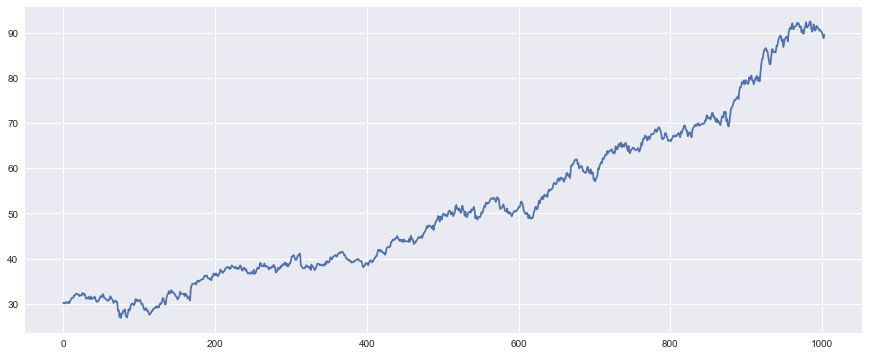

In [3]:
plt.figure(figsize=(15,6))
plt.plot(df['Adj Close'])
plt.show()

## Moving Average Convergence/Divergence (MACD)

- MACD is calculated by subtracting the 26-period EMA from the 12-period EMA.
- An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points.
- A 9-day EMA of the MACD called the "signal line".
- MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line.
- The speed of crossovers is also taken as a signal of a market is overbought or oversold.  
$$
ema(P_t,\beta)=\beta*P_t+(1-\beta)*ema(P_{t-1},\beta)  \\
\beta = \frac{2}{n+1}, \beta<1  \\
\text{starting with sma}
$$

In [4]:
df['EMA_12day'] = df[['Adj Close']].ewm(span=12, min_periods=12, adjust=False).mean()
df['EMA_26day'] = df[['Adj Close']].ewm(span=26, min_periods=26, adjust=False).mean()
df['MACD'] = df['EMA_12day'] - df['EMA_26day']
df['Signal_line'] = df[['MACD']].ewm(span=9, min_periods=9, adjust=False).mean()
df['Signal'] = np.where((df['MACD']-df['Signal_line'])>0, 'Buy', 'Sell')

In [5]:
df.iloc[60:70,:]

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_12day,EMA_26day,MACD,Signal_line,Signal
60,2011-07-19,36.799999,37.189999,36.680000,37.119999,30.961409,6626500,31.061309,31.156936,-0.095627,-0.038895,Sell
61,2011-07-20,36.860001,37.099998,36.709999,36.950001,30.923750,4815200,31.040146,31.139663,-0.099517,-0.051019,Sell
62,2011-07-21,37.860001,38.820000,37.500000,37.820000,31.651878,25907700,31.134259,31.177605,-0.043346,-0.049485,Buy
63,2011-07-22,37.880001,38.000000,37.299999,37.349998,31.258505,9280200,31.153374,31.183598,-0.030224,-0.045633,Buy
64,2011-07-25,37.119999,37.310001,36.950001,37.060001,31.015810,5090700,31.132210,31.171169,-0.038959,-0.044298,Buy
65,2011-07-26,37.259998,37.270000,36.799999,36.860001,30.848429,6365700,31.088551,31.147262,-0.058711,-0.047180,Sell
66,2011-07-27,36.709999,36.860001,35.980000,36.060001,30.178915,10394500,30.948607,31.075533,-0.126926,-0.063129,Sell
67,2011-07-28,36.020000,36.840000,36.009998,36.419998,30.480186,8919400,30.876543,31.031433,-0.154891,-0.081482,Sell
68,2011-07-29,36.070000,36.540001,35.970001,36.349998,30.421604,8812700,30.806552,30.986261,-0.179709,-0.101127,Sell
69,2011-08-01,36.779999,37.160000,36.230000,36.680000,30.697779,11393400,30.789818,30.964892,-0.175074,-0.115916,Sell


# Problem 2

Find technical strategy that yields $\textbf{positive}$ total return for chosen time period. The sample should accommodate at least $\textbf{four}$ round-trip trades (buy-sells and/or sell-buys)/

In [6]:
df['Action'] = '-'
num_trades = 0
num_pos_trades = 0 
# return_list is used to calculate the return of each round
return_list = []
# close is uese to save the adj close during trading period
close = pd.Series()
# Suppose we can't buy sell
# Find the first buy signal
begin = df[df['Signal']=='Buy'].index.tolist()[0]

for i in range(begin, len(df)):
    if df['Signal'].iloc[i]=='Buy' and df['Signal'].iloc[i-1]=='Sell':
        df.loc[i, 'Action']='Buy'
        mark = i
    if df['Signal'].iloc[i]=='Sell' and df['Signal'].iloc[i-1]=='Buy':
        df['Action'].iloc[i]='Sell'
        close = pd.Series.append(close, df['Adj Close'].iloc[mark:i+1], 
                                 ignore_index=True)
        num_trades += 1
        r = df.loc[i, 'Adj Close']/df.loc[mark, 'Adj Close']-1
        return_list.append(r)
        if r > 0:
            num_pos_trades += 1
            
return_list = pd.DataFrame(return_list, columns={'return'})
df.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Date,Open,High,Low,Close,Adj Close,Volume,EMA_12day,EMA_26day,MACD,Signal_line,Signal,Action
0,2011-04-21,36.240002,36.340000,36.130001,36.209999,30.202391,4603300,NaN,NaN,NaN,NaN,Sell,-
1,2011-04-25,36.049999,36.220001,35.930000,36.020000,30.043913,3879700,NaN,NaN,NaN,NaN,Sell,-
2,2011-04-26,36.139999,36.630001,36.080002,36.090000,30.102303,9300000,NaN,NaN,NaN,NaN,Sell,-
3,2011-04-27,36.160000,36.480000,36.049999,36.369999,30.335857,7989700,NaN,NaN,NaN,NaN,Sell,-
4,2011-04-28,36.250000,36.320000,36.020000,36.250000,30.235748,8127800,NaN,NaN,NaN,NaN,Sell,-


In [7]:
close = pd.DataFrame(close)
close

,0
0,31.670403
1,31.436844
2,31.495220
3,32.145805
4,31.778820
5,31.228313
6,31.169924
7,31.111551
8,30.836300
9,31.651878


In [8]:
cum_return = (1+return_list).cumprod()
total_return_pct = 100*(cum_return.iloc[-1] - 1)
total_return_pct = total_return_pct[0].round(2)
total_return_pct

79.049999999999997

In [9]:
win_trades = num_pos_trades/num_trades
win_trades_pct = 100*win_trades
win_trades_pct

63.63636363636363

In [10]:
df['drawdown'] = close/close.cummax()-1
max_drawdown = -df['drawdown'].min()
max_drawdown_pct = (max_drawdown*100).round(2)
max_drawdown_pct

11.56

# Problem 3

Desrcibe performance measures other than total return, and P/L histogram.

In [11]:
result = pd.DataFrame(data=[['Empirical', num_trades, total_return_pct, win_trades_pct, max_drawdown_pct]],
                      columns=['Sample', '# of round-trip trades', 'Total return, %', 'Winning trades, %', 'Max drawdown, %'],
                      index={'CVS'})
# result.round({'Winning trades, %':2})
result

,Sample,# of round-trip trades,"Total return, %","Winning trades, %","Max drawdown, %"
CVS,Empirical,33,79.05,63.636364,11.56


Summary:
- According to the table above, during the 5 years, using MACD strategy, it has 33 round-trip rates. Moreover, the total return in 5 years is 79.05%. The max drawdown is 11.56%. Hence, it's a satisfied strategy which balances return and volatility.

In [12]:
m = return_list.mean()
std = return_list.std()
normal_dist = np.random.normal(m, std, 1000)

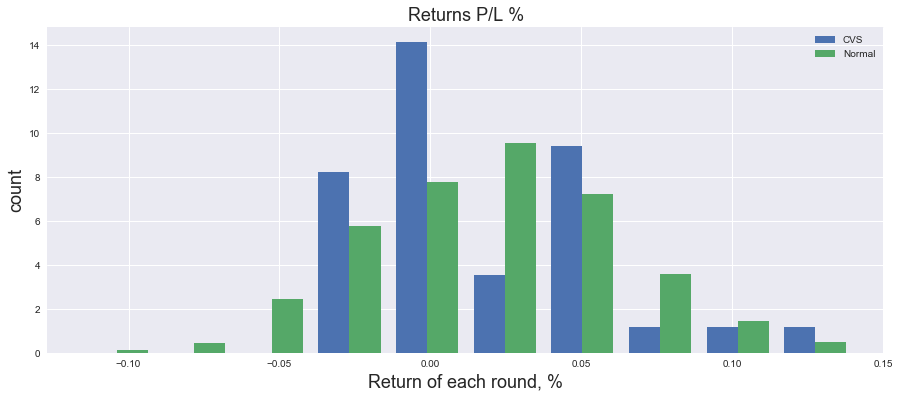

In [13]:
return_list = return_list.values
m = return_list.mean()
std = return_list.std()
normal_dist = np.random.normal(m, std, 1000)
plt.figure(figsize=(15,6))
plt.title('Returns P/L %', fontsize=18)
plt.xlabel('Return of each round, %', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.hist([return_list, normal_dist], density = True, label =['CVS','Normal'])
plt.legend()

# plt.title('Returns P/L', fontsize=18)

# sns.distplot( return_list , color="skyblue", label="CVS");
# sns.distplot( normal_dist , color="red", label="Normal");
# plt.legend()